# Subsample the dataset
Fully balance the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from aicsimageprocessing import diagnostic_sheet, read_ome_zarr, rescale_image, imgtoprojection
from upath import UPath as Path
import warnings
from aicsimageio import transforms, AICSImage
import nbvv
import os
import numpy as np
import time
from scipy.spatial import distance
from serotiny.io.image import image_loader

19-Oct-22 22:45:36 - bfio.backends - WARNING  - Java backend is not available. This could be due to a missing dependency (jpype).


In [2]:
df = pd.read_csv('/home/aicsuser/cytodata-hackathon-base/data/mitocells.csv')

In [3]:
from serotiny.transforms.dataframe.transforms import split_dataframe
Path("/home/aicsuser/cytodata-hackathon-base/data/").mkdir(parents=True, exist_ok=True)

# Sample n cells per group
n = 981 # number of cells per mitotic class
cells_to_include=[]
for name, group in df.groupby('cell_stage'):    
    sampled_group = group.sample(min([n,len(group)]))
    cells_to_include.append(sampled_group)
df_mitocells = pd.concat(cells_to_include).reset_index(drop=True)

# Discarding all the M6M7_single cells
df_mitocells = df_mitocells.drop(df_mitocells[df_mitocells['cell_stage']=='M6M7_single'].index)


In [4]:
# Add the train, test and validate split
df_mitocells = split_dataframe(dataframe=df_mitocells, train_frac=0.7, val_frac=0.2, return_splits=False)

df_mitocells.to_csv("/home/aicsuser/cytodata-hackathon-base/data/mitocells_classbalance_v2.csv") 

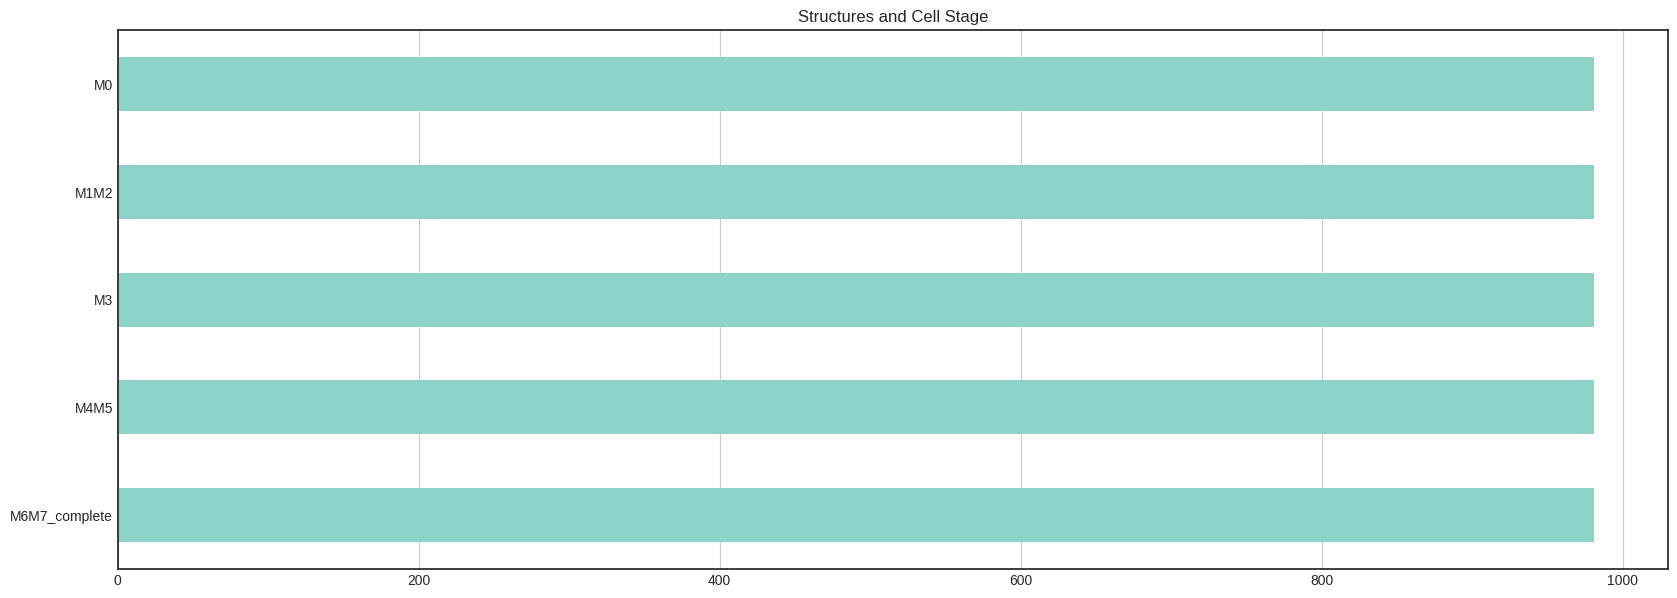

cell_stage
M0               981
M1M2             981
M3               981
M4M5             981
M6M7_complete    981
dtype: int64


In [5]:
# The bar plot again
%matplotlib inline
plt.style.use('seaborn-v0_8-white')   #print(plt.style.available)
# Code from Chapter 4 to make a bar plot
table = pd.pivot_table(df_mitocells, index="cell_stage", aggfunc="size")
fig, axes = plt.subplots(figsize=(20, 7), dpi=100)
table.plot.barh(stacked=True, ax=axes)
axes.set_ylabel(None)
axes.set_title("Structures and Cell Stage")
axes.grid(True, which="major", axis="x")
axes.set_axisbelow(True)
axes.invert_yaxis()
plt.show()
print(table)